In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import sys
print(sys.executable)

/opt/conda/envs/anaconda-2024.02-py310/bin/python


In [3]:
import sys
!{sys.executable} -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

2025-09-01 17:58:14.030072: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 17:58:14.491183: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 17:58:14.765077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756749495.059447     152 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756749495.149339     152 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756749495.803873     152 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [8]:
train_df = pd.read_csv('DIA_trainingset_RDKit_descriptors.csv')
test_df = pd.read_csv('DIA_testset_RDKit_descriptors.csv')

In [9]:
train_df

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,C(C1=NCCN1)c2cccc3ccccc23,2.022,537.932,10.795,9.110,9.110,7.933,5.672,5.672,...,0,0,0,0,0,0,0,0,0,0
473,0,C[N@+]1(CC2CC2)CC[C@]34[C@H]5Oc6c(O)ccc(C[C@@H...,1.602,848.658,17.897,15.202,15.202,12.389,10.003,10.003,...,0,0,0,0,0,0,0,0,0,0
474,1,CO\N=C(/C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(=O)O...,1.766,910.031,21.129,14.986,15.802,13.845,8.129,9.178,...,1,0,0,0,0,0,0,0,0,0
475,0,Clc1ccc(CO\N=C(\Cn2ccnc2)/c3ccc(Cl)cc3Cl)c(Cl)c1,1.831,926.191,18.518,13.372,16.396,12.525,7.566,9.078,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df

,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C[C@H](\C=C\[C@H](O)C1CC1)[C@@H]2CC[C@@H]3\C(=...,1.484,743.207,21.466,18.764,18.764,14.292,12.106,12.106,...,0,0,0,0,0,0,0,0,0,0
1,1,OCCN1CCN(CCCN2c3ccccc3Sc4ccc(cc24)C(F)(F)F)CC1,1.472,868.947,21.140,16.736,17.553,14.453,10.268,11.084,...,0,0,0,0,0,0,0,0,0,0
2,0,C[C@@H]1O[C@H](C[C@H](O)[C@@H]1O)O[C@@H]2[C@H]...,0.837,1409.004,39.189,32.904,32.904,26.011,20.941,20.941,...,0,0,0,0,0,0,0,0,0,0
3,1,NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N,2.406,621.298,13.828,10.297,10.297,9.092,5.847,5.847,...,0,0,0,0,0,0,0,0,0,0
4,0,COc1cc2c(CCN[C@]23CS[C@@H]4[C@@H]5[C@@H]6N(C)[...,1.320,2127.996,37.955,30.849,31.666,25.910,18.066,19.115,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,CCN1CCN(C(=O)N[C@H](C(=O)N[C@@H]2[C@@H]3SC(C)(...,1.508,1127.109,26.361,19.925,20.742,16.973,11.450,12.330,...,1,0,0,0,0,0,0,0,0,1
116,0,CC1=C(C=C(C#N)C(=O)N1)c2ccncc2,2.678,608.396,11.544,8.689,8.689,7.720,4.765,4.765,...,0,0,0,0,0,0,0,0,0,0
117,0,CCCN(CCc1cccs1)[C@@H]2CCc3c(O)cccc3C2,1.670,593.488,15.364,13.294,14.110,10.775,8.338,9.217,...,0,0,0,0,0,0,0,1,0,0
118,0,COCCOC(=O)C1=C(C)NC(=C([C@@H]1c2cccc(c2)[N+](=...,2.603,902.371,22.422,17.683,17.683,14.167,9.469,9.469,...,0,0,0,0,0,0,0,0,1,0


In [8]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
X = combined_df.drop(['Label', 'SMILES'], axis=1)
y = combined_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
def create_model(units=32, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

In [13]:
param_grid = {
    'model__units': [16, 32, 64],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)

In [16]:
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-29 00:45:07.267233: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   5.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   3.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   3.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   4.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   4.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   4.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   4.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   5.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   6.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   4.5s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   3.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   4.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   3.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   4.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   4.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   4.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   3.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   4.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   4.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   6.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   7.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   8.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   6.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   7.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   7.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   6.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=64; total time=   6.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=64; total time=  10.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.3, model__units=64; total time=   7.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   7.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   7.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   7.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   6.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   6.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   6.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   8.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   9.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   7.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   7.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   7.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   6.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=32; total time=   7.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=32; total time=   7.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=32; total time=  10.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   7.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   6.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   7.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   3.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=16; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=32; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.3, model__units=64; total time=   6.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   3.5s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   3.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=16; total time=   4.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   4.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=32; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.5, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   3.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   3.2s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=16; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=32; total time=   3.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   6.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__dropout_rate=0.7, model__units=64; total time=   3.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   5.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=16; total time=   5.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   6.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=32; total time=   5.8s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=64; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=64; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.3, model__units=64; total time=   9.3s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   5.5s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=16; total time=   6.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   5.5s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=32; total time=   6.0s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.5, model__units=64; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   6.4s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   8.1s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=16; total time=   5.5s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=32; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=32; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=32; total time=   5.6s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   6.9s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=100, model__dropout_rate=0.7, model__units=64; total time=   5.7s


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
print("Best Parameters:", grid_result.best_params_)

Best Parameters: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.5, 'model__units': 64}


In [18]:
best_model = create_model(units=64, dropout_rate=0.5)

/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [20]:
history = best_model.fit(X_train_scaled, y_train, 
                         validation_split=0.25, 
                         epochs=50, 
                         batch_size=16, 
                         callbacks=[early_stop])

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4757 - loss: 1.1568 - val_accuracy: 0.7232 - val_loss: 0.5831
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6337 - loss: 0.7582 - val_accuracy: 0.7232 - val_loss: 0.5625
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6652 - loss: 0.7345 - val_accuracy: 0.7321 - val_loss: 0.5584
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.6897 - val_accuracy: 0.7232 - val_loss: 0.5485
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7036 - loss: 0.6512 - val_accuracy: 0.7321 - val_loss: 0.5446
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7611 - loss: 0.5315 - val_accuracy: 0.7411 - val_loss: 0.5464
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.5443 - val_accuracy: 0.7500 - val_loss: 0.5376
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7903 - loss: 0.4898 - val_accuracy: 0.7411 - val_loss

In [21]:
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8298 - loss: 0.3366  
Test Loss: 0.4917
Test Accuracy: 0.7733


In [22]:
import matplotlib.pyplot as plt

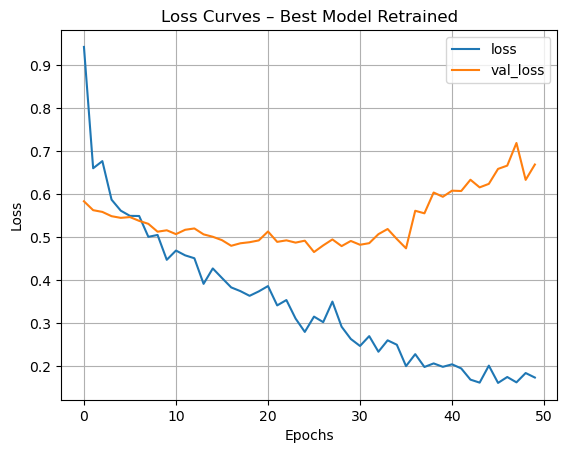

In [23]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
plt.title("Loss Curves – Best Model Retrained")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1, callbacks=[early_stop])

Epoch 1/50


/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3680 - loss: 1.3480 - val_accuracy: 0.3125 - val_loss: 0.9448
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3733 - loss: 1.0920 - val_accuracy: 0.4107 - val_loss: 0.7939
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4814 - loss: 0.9113 - val_accuracy: 0.5268 - val_loss: 0.7303
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5918 - loss: 0.7084 - val_accuracy: 0.6339 - val_loss: 0.6978
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5289 - loss: 0.7938 - val_accuracy: 0.6607 - val_loss: 0.6702
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6209 - loss: 0.7021 - val_accuracy: 0.6875 - val_loss: 0.6503
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6901 - loss: 0.6279 - val_accuracy: 0.6964 - val_loss: 0.6410
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6987 - loss: 0.5933 - val_accuracy: 0.6964 - val_loss: 0.6247
Ep

In [26]:
# model_loss = pd.DataFrame(history.history)
# model_loss[['loss', 'val_loss']].plot()

In [27]:
# loss, accuracy = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [29]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

conf = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf.ravel()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn) 
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.7667
F1 Score: 0.3636
Sensitivity (Recall): 0.2703
Specificity: 0.9292


In [30]:
import sys
print(sys.executable)

/opt/conda/envs/anaconda-2024.02-py310/bin/python


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier

In [32]:
## Wrap so that I can use my Keras model with scikit-learn tools like cross validation
model_cv = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

In [33]:
## Splitting the data into balanced parts to test the model- stratified k fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model_cv, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/670eee88-5c7b-45c6-83c2-a268349f910e/.local/lib/python3.10/site-packag

In [34]:
print("Cross-validated Accuracy Scores:", results)
print("Mean Cross-validated Accuracy: %.4f" % results.mean())

Cross-validated Accuracy Scores: [0.81111111 0.81111111 0.76404494 0.84269663 0.78651685]
Mean Cross-validated Accuracy: 0.8031


In [35]:
## How many nodes needed in the input layer 
    # The number of nodes needed in the input layer is 197. There are a total of 198 columns in the training data set. One of those columns 
    # is the label column so that one doesn't count. This brings the total to 197. And using the code model.add(Dense(32, input_dim=X.shape[1],
    # activation='relu')) I am basically saying the input data has 197 features, so create 197 input connections for each of the nodes in this 
    # first hidden layer.  

In [36]:
from tensorflow import keras

In [37]:
## New model so I can use GridSearchCV to find the best number of hidden layers without having to manually do it 
def create_model(units=32, dropout_rate=0.2, n_hidden_layers=1):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X.shape[1],)))

    for _ in range(n_hidden_layers):
        model.add(keras.layers.Dense(units, activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [38]:
model = KerasClassifier(model=create_model, verbose=0)

In [39]:
# new
param_grid = {
    'model__units': [16, 32],
    'model__dropout_rate': [0.2, 0.3],
    'model__n_hidden_layers': [1, 2, 3]
}

In [40]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'model__dropout_rate': [0.2, 0.3], 'model__n_hidden_layers': [1, 2, ...], 'model__units': [16, 32]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function cre...x75be7cb9a4d0>


In [41]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'model__dropout_rate': 0.3, 'model__n_hidden_layers': 2, 'model__units': 16}


In [42]:
## Building new model with best hyperparameters
new_model = create_model(
    units=16,
    dropout_rate=0.2,
    n_hidden_layers=2
)

In [43]:
## Fitting on training set 
new_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6883 - loss: 0.6693   
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7553 - loss: 0.6058 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7294 - loss: 0.5709 
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.5360 
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4626 
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7564 - loss: 0.4819 
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4788 
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4698 
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4512 
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3877 
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.3930 
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [44]:
## Evaluating on test set 
loss, accuracy = new_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.8200


In [45]:
## Get predicted probabilities and convert to binary (Is 0.5 a good threshold?)
y_pred_probs = new_model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [46]:
## Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf.ravel()
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [47]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8200
F1 Score: 0.5846
Sensitivity (Recall): 0.5135
Specificity: 0.9204


In [48]:
print("True labels:", np.unique(y_test, return_counts=True))
## array([90, 30]) means that there are 90 zeros and 30 ones so the model is likely ignoring the 30

True labels: (array([0, 1]), array([113,  37]))


In [49]:
y_pred_probs = new_model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.3).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [50]:
conf = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf.ravel()
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [51]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8000
F1 Score: 0.6154
Sensitivity (Recall): 0.6486
Specificity: 0.8496


In [54]:
#!pip cache purge
#!du -sh *
#!rm -rf README.ipynb
# !du -sh *
# !du -sh .??*
# !pip cache purge
# !rm -rf ~/.cache/*
# !rm -rf ~/.local/lib/python*/site-packages/tensorflow
# !rm -rf ~/.local/lib/python*/site-packages/keras
# import tensorflow as tf
# print(tf.__version__)
# !pip uninstall -y tensorflow keras keras-nightly keras-preprocessing
# !rm -rf ~/.local/lib/python*/site-packages/tensorflow*
# !rm -rf ~/.local/lib/python*/site-packages/keras*
# !pip uninstall -y tensorflow keras keras-nightly keras-preprocessing
# !rm -rf ~/.local/lib/python*/site-packages/tensorflow*
# !rm -rf ~/.local/lib/python*/site-packages/keras*
# !rm -rf ~/.local/lib/python*/site-packages/tensorboard*
# !rm -rf ~/.local/lib/python*/site-packages/gast*
# !pip cache purge
# !rm -rf ~/.cache/*

In [ ]:
## Confusion matrix table
## Rough draft for explanation of whole code

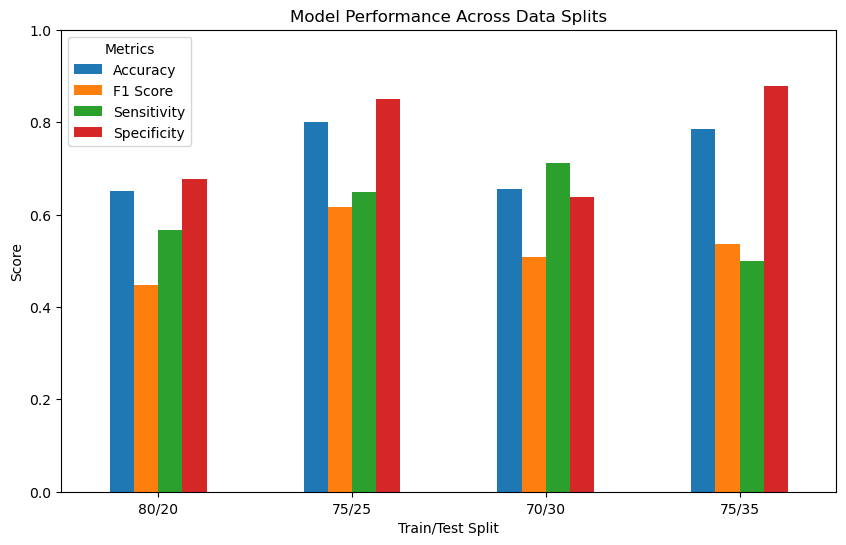

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
splits = ["80/20", "75/25", "70/30", "75/35"]

data = {
    "Accuracy": [0.6500, 0.8000, 0.6556, 0.7847],
    "F1 Score": [0.4474, 0.6154, 0.5079, 0.5361],
    "Sensitivity": [0.5667, 0.6486, 0.7111, 0.5000],
    "Specificity": [0.6778, 0.8496, 0.6370, 0.8790]
}

# Create dataframe
df = pd.DataFrame(data, index=splits)

# Plot grouped bar chart
df.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.title("Model Performance Across Data Splits")
plt.xlabel("Train/Test Split")
plt.ylabel("Score")
plt.ylim(0, 1)  # since metrics are between 0 and 1
plt.legend(title="Metrics")
plt.xticks(rotation=0)

# Show chart
plt.show()
